# Разведочный анализ данных. Исследование и визуализация данных.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Рассмотрим датасет с данными предсказаний продолжительности жизни людей в разных странах

# Текстовое описание набора данных
Файл "life_expectancy" содержит следующие колонки:
- Unnamedte идентификатор каждой строки датасета
- Country - название страны
- Country Code - код страны
- Year - год рождения человека
- Female Life Expectancy - продолжительность жизни женщины
- Male Life Expectancy - продолжительность жизни мужчины
- Population - численность населения
- Life Expectancy Gap - разница продолжительности жизни мужчины и женщиныиначе 0.

In [7]:
data = pd.read_csv('C:\\MGTU\\6 semestr\\TMO\\life_expectancy.csv')

# Основные характеристики датасета:

In [8]:
data.head()

,Unnamed: 0,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000


In [9]:
data.shape

(17003, 8)

In [10]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 17003


In [11]:
data.columns

Index(['Unnamed: 0', 'Country', 'Country Code', 'Year',
       'Female Life Expectancy', 'Male Life Expectancy', 'Population',
       'Life Expectancy Gap'],
      dtype='object')

In [12]:
data.dtypes

Unnamed: 0                  int64
Country                    object
Country Code               object
Year                        int64
Female Life Expectancy    float64
Male Life Expectancy      float64
Population                float64
Life Expectancy Gap       float64
dtype: object

In [13]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Unnamed: 0 - 0
Country - 0
Country Code - 0
Year - 0
Female Life Expectancy - 0
Male Life Expectancy - 0
Population - 0
Life Expectancy Gap - 0


Основные статистические характеристки набора данных

In [92]:
data.describe()

,Unnamed: 0,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
count,17003.000000,17003.000000,17003.000000,17003.000000,1.700300e+04,17003.000000
mean,9133.030171,1985.519085,66.168444,61.202554,2.131189e+07,-4.965890
std,5340.684374,20.790029,12.521956,11.578585,9.442073e+07,2.390082
min,0.000000,1950.000000,12.700000,10.100000,1.363000e+03,-29.500000
25%,4401.500000,1968.000000,57.800000,53.700000,2.390965e+05,-6.300000
50%,9019.000000,1986.000000,69.200000,63.600000,3.245066e+06,-4.800000
75%,13852.500000,2004.000000,75.900000,69.900000,1.103752e+07,-3.400000
max,18407.000000,2021.000000,88.700000,84.800000,1.425894e+09,9.900000


In [15]:
# Определим уникальные значения для кода страны
data['Country Code'].unique()

array(['OWID_ABK', 'AFG', 'OWID_AKD', 'ALB', 'DZA', 'ASM', 'AND', 'AGO',
       'AIA', 'ATA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE',
       'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU',
       'BTN', 'BOL', 'BES', 'BIH', 'BWA', 'BRA', 'IOT', 'VGB', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF',
       'TCD', 'CHL', 'CHN', 'CXR', 'CCK', 'COL', 'COM', 'COG', 'COK',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'TLS', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'EST', 'SWZ', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF',
       'PYF', 'ATF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC',
       'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY',
       'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ',
       'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ',
       'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR'

# Визуальное исследлование датасета

Диаграмма рассеиввания

<Axes: xlabel='Year', ylabel='Male Life Expectancy'>

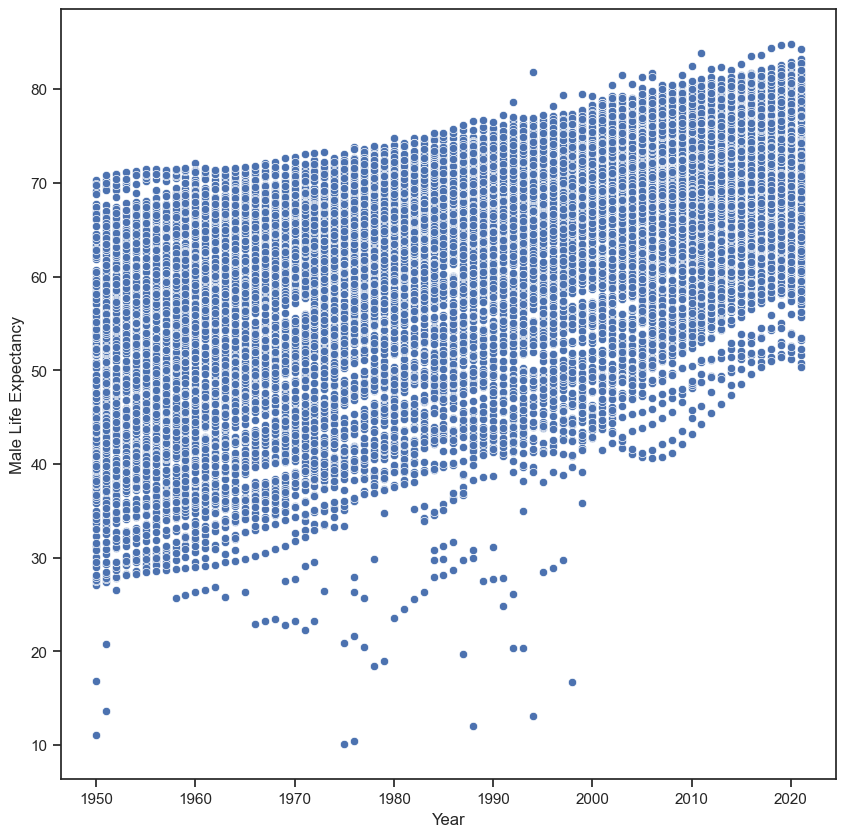

In [22]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Year', y='Male Life Expectancy', data=data)

<Axes: xlabel='Year', ylabel='Male Life Expectancy'>

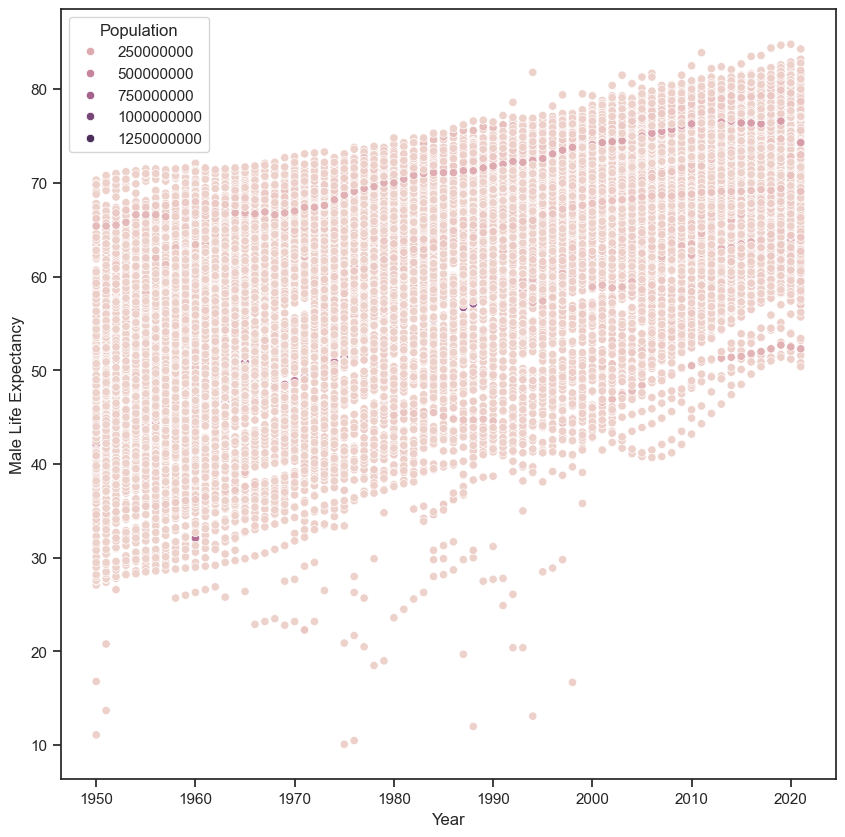

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Year', y='Male Life Expectancy', data=data, hue='Population')

Гистограмма

C:\Users\Aleks\AppData\Local\Temp\ipykernel_12672\2122518706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Population'])


<Axes: xlabel='Population', ylabel='Density'>

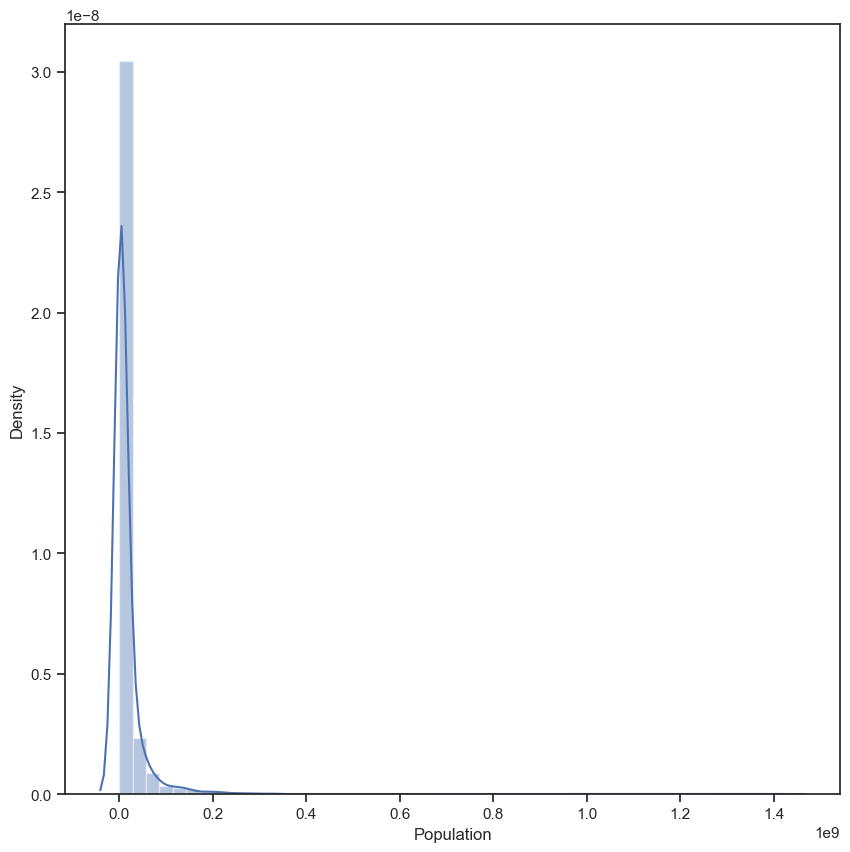

In [25]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Population'])

Комбинация гистограмм и диаграмм рассеивания

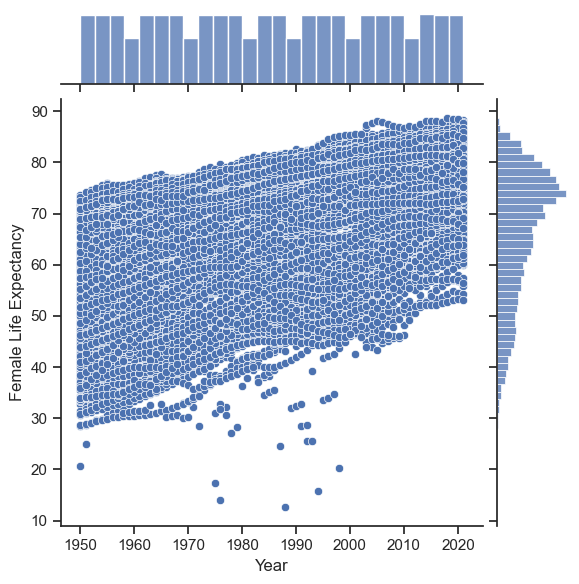

In [26]:
sns.jointplot(x='Year', y='Female Life Expectancy', data=data)

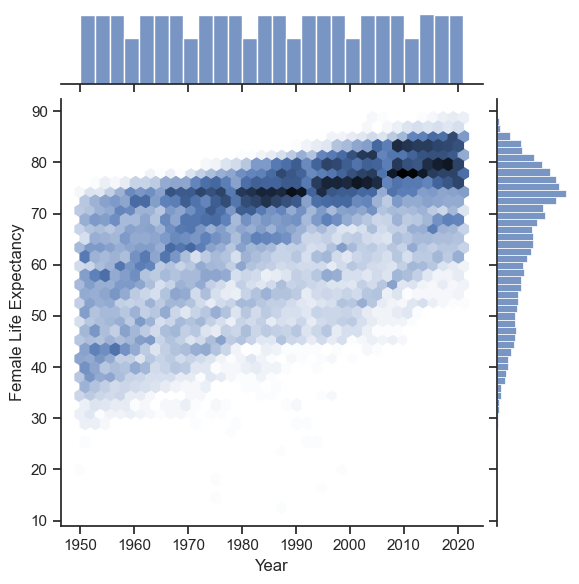

In [28]:
sns.jointplot(x='Year', y='Female Life Expectancy', data=data, kind = 'hex')

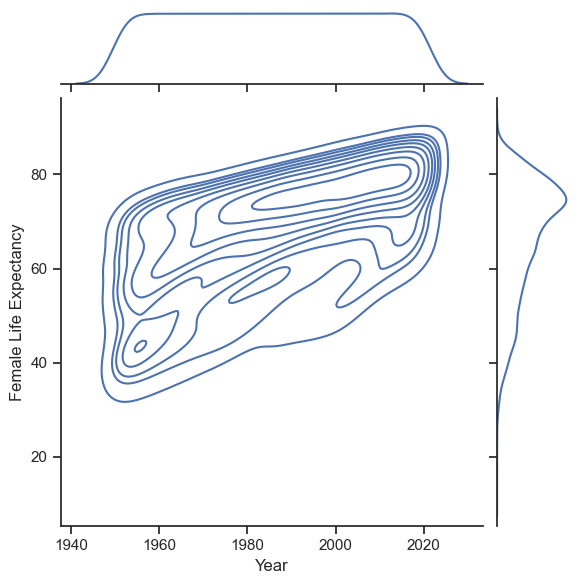

In [31]:
sns.jointplot(x='Year', y='Female Life Expectancy', data=data, kind = 'kde')

Комбинация гистограмм и диаграмм рассеивания для всего набора данных

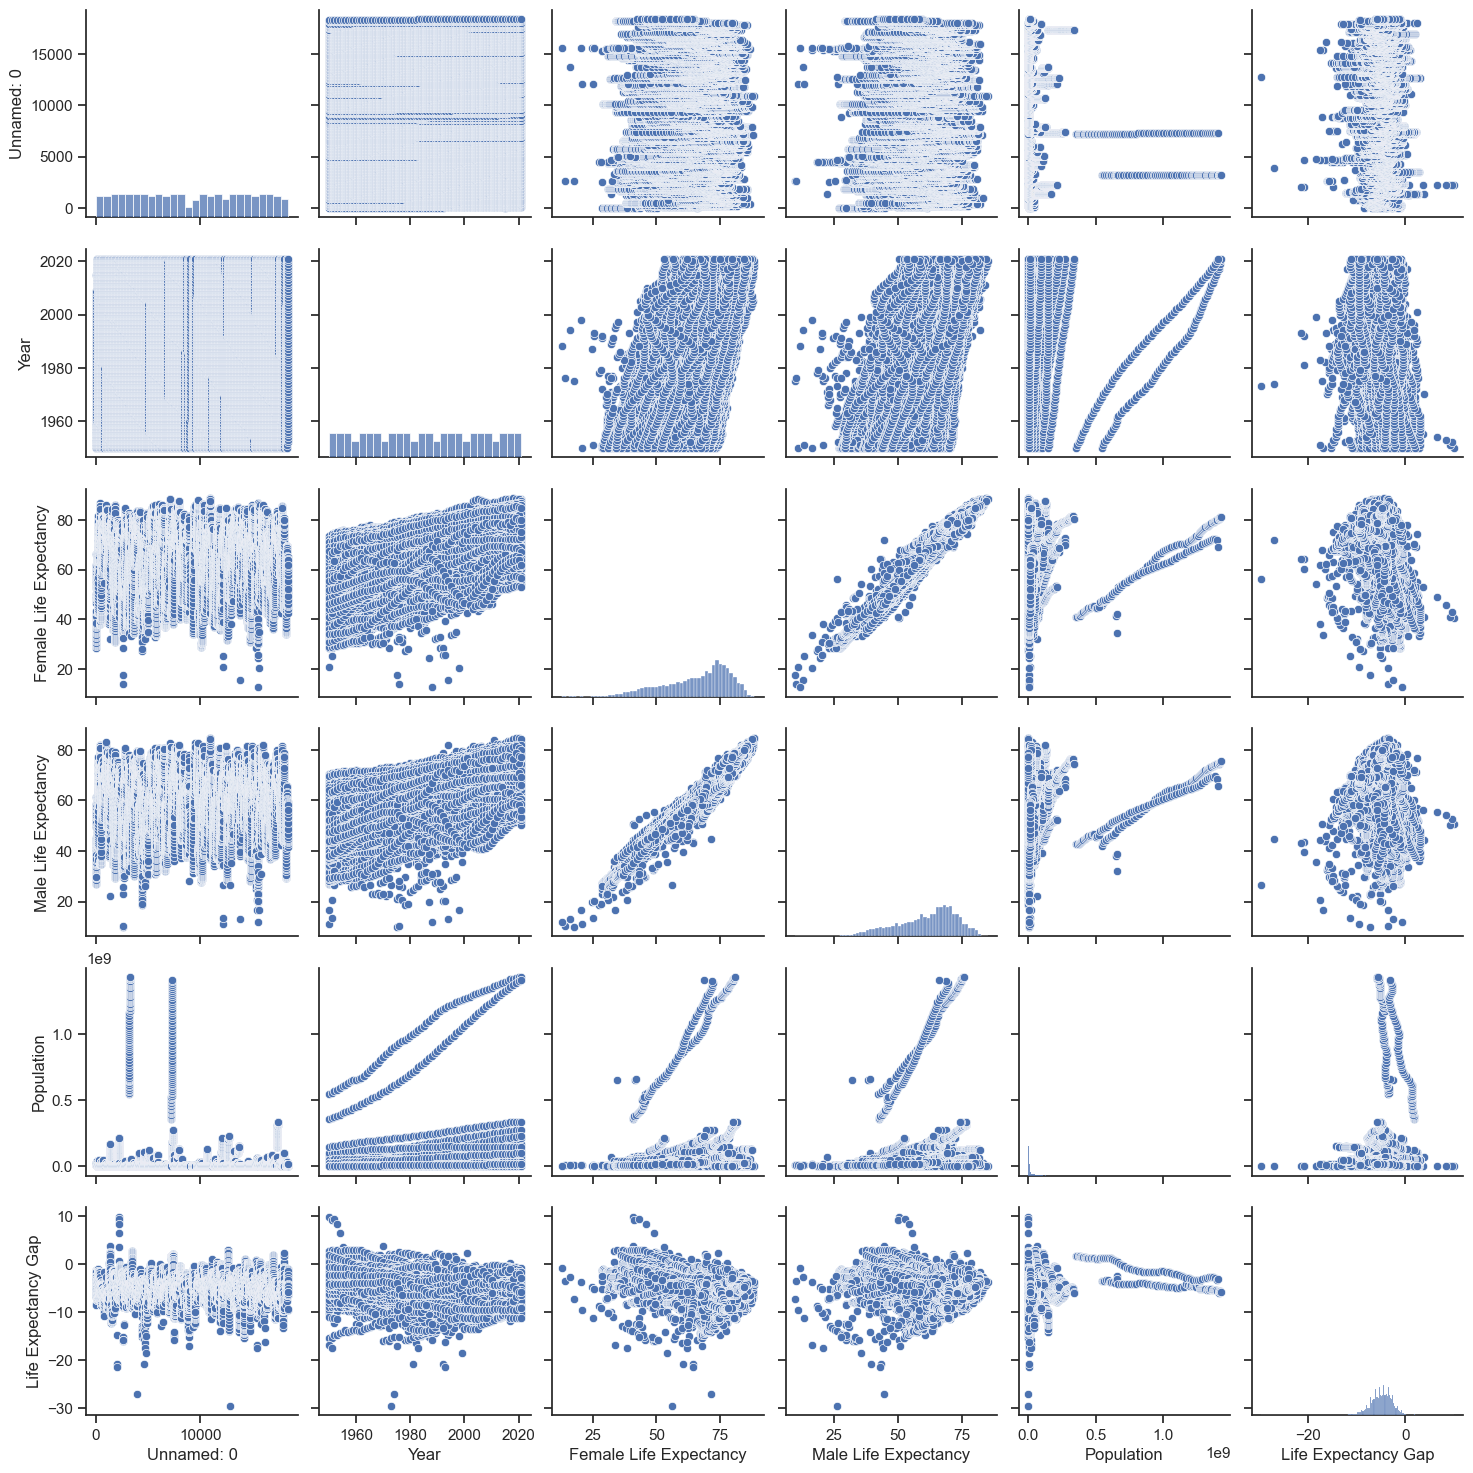

In [32]:
sns.pairplot(data)

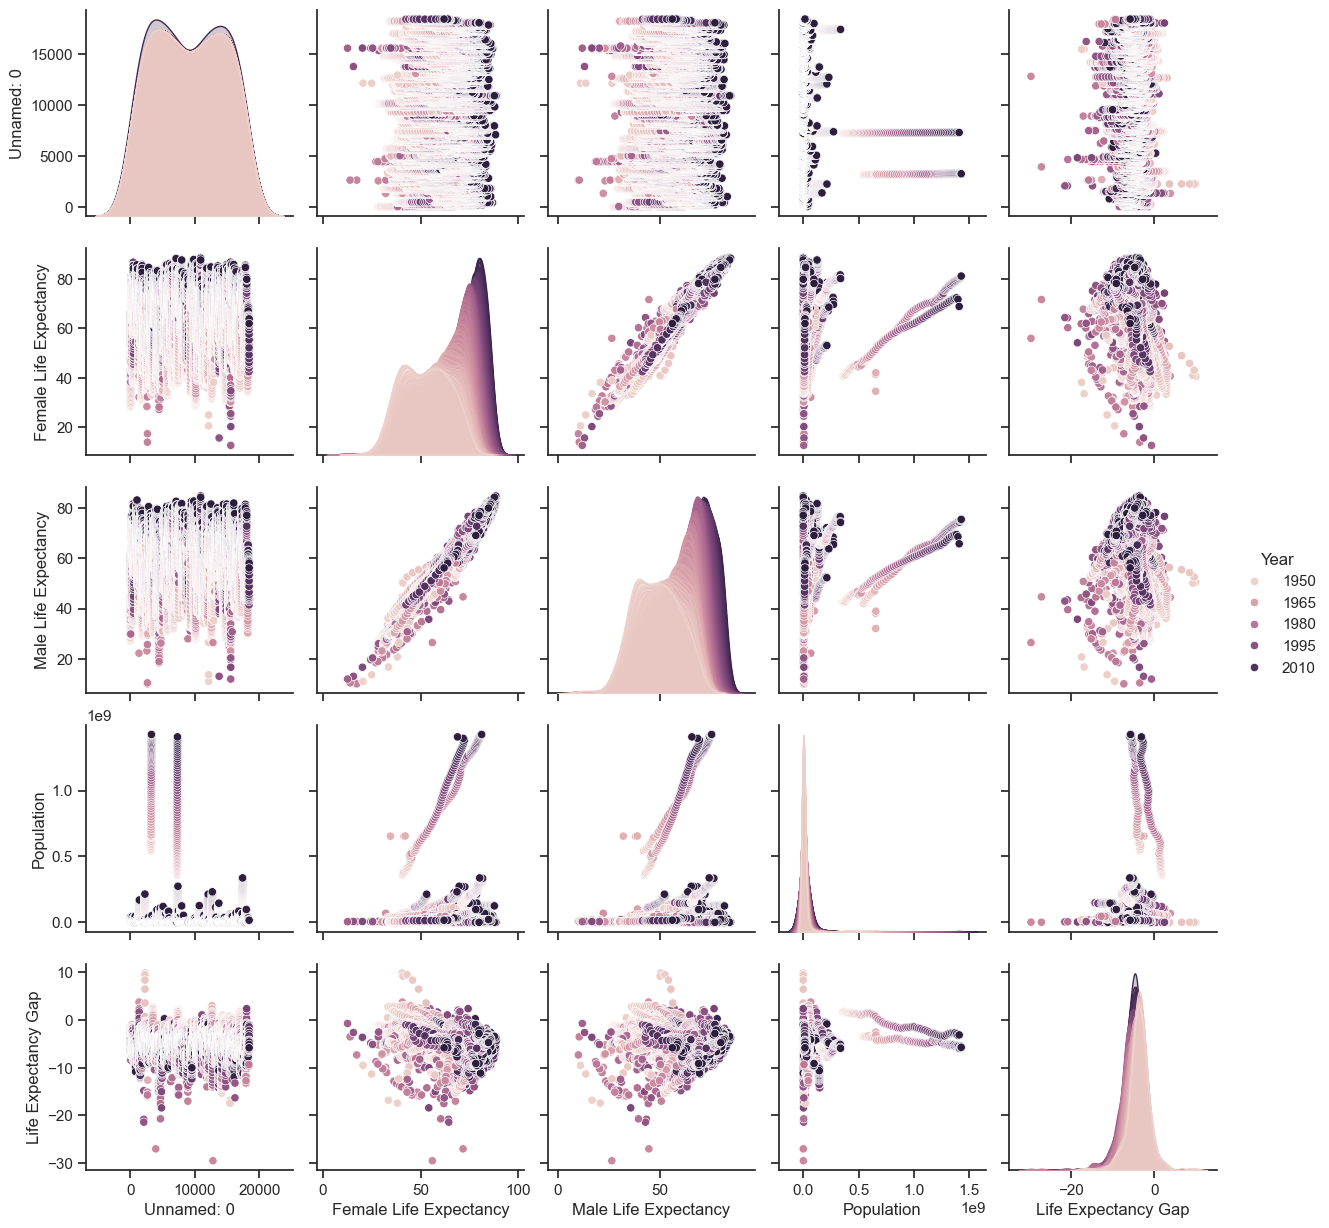

In [48]:
sns.pairplot(data, hue="Year")

Отображение одномерного распределения вероятности

<Axes: xlabel='Year'>

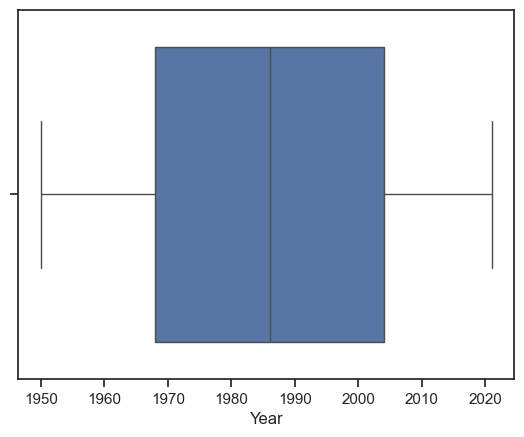

In [50]:
sns.boxplot(x=data['Year'])

<Axes: ylabel='Year'>

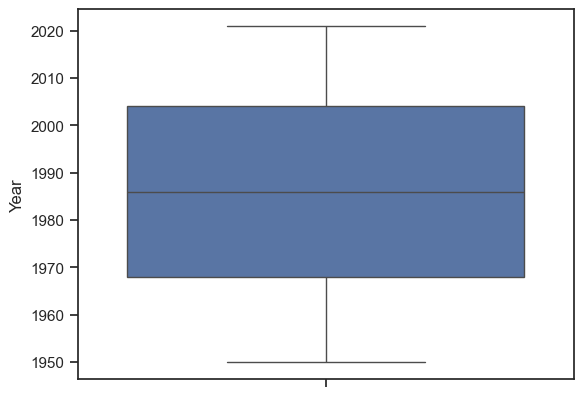

In [49]:
sns.boxplot(y=data['Year'])

<Axes: xlabel='Year', ylabel='Male Life Expectancy'>

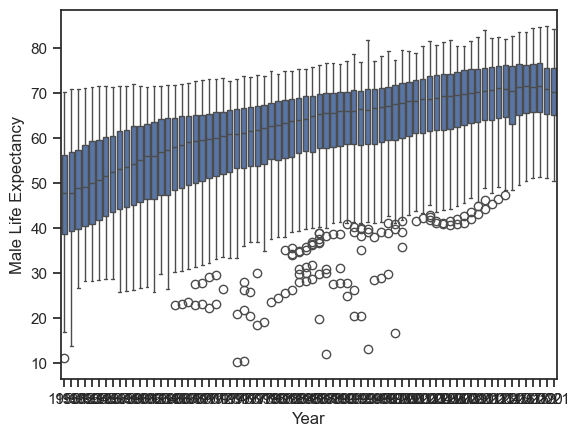

In [53]:
sns.boxplot(x='Year', y='Male Life Expectancy', data=data)

<Axes: xlabel='Male Life Expectancy'>

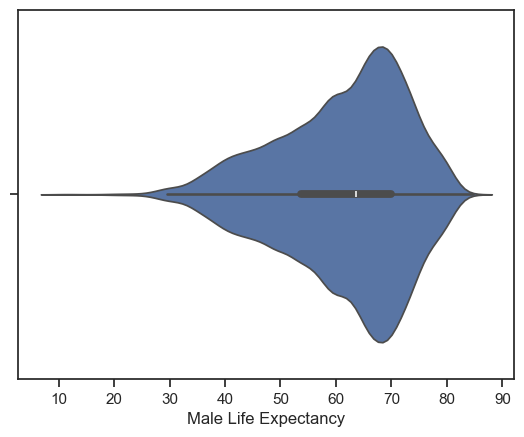

In [55]:
sns.violinplot(x=data['Male Life Expectancy'])

C:\Users\Aleks\AppData\Local\Temp\ipykernel_12672\2621579752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Male Life Expectancy'], ax=ax[1])


<Axes: xlabel='Male Life Expectancy', ylabel='Density'>

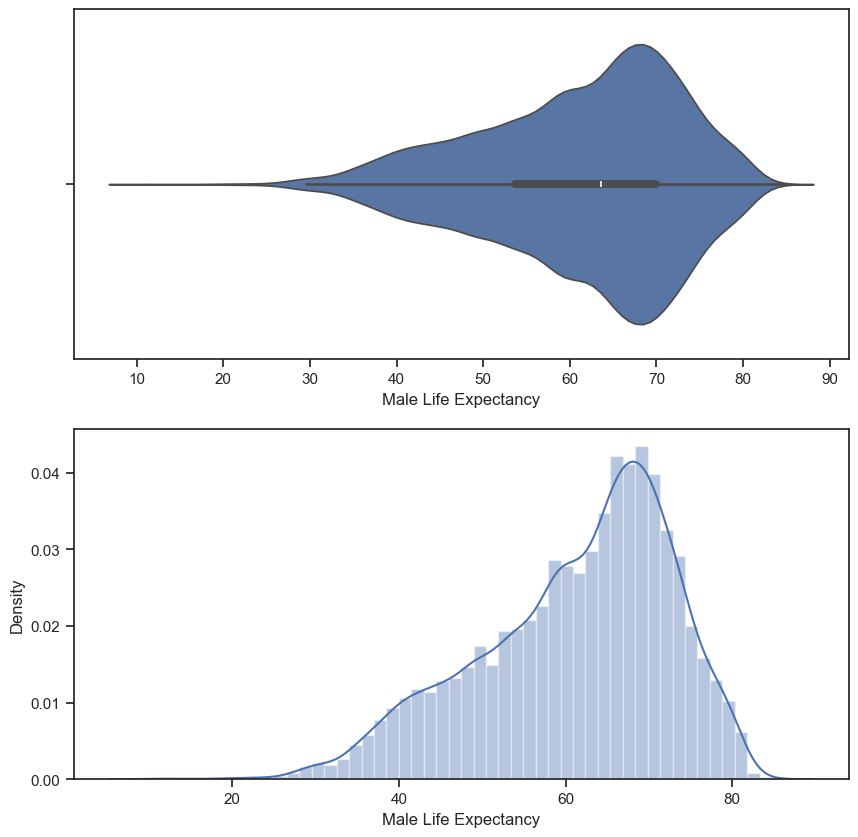

In [58]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Male Life Expectancy'])
sns.distplot(data['Male Life Expectancy'], ax=ax[1])

<Axes: xlabel='Year', ylabel='Male Life Expectancy'>

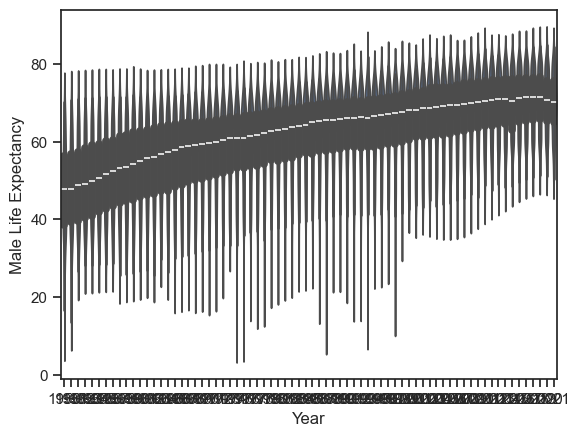

In [61]:
sns.violinplot(x='Year', y='Male Life Expectancy', data=data)

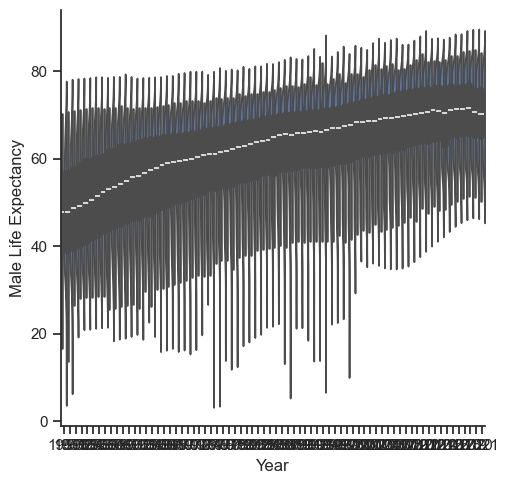

In [63]:
sns.catplot(x='Year', y='Male Life Expectancy', data=data, kind="violin", split=True)

# Информация о корреляции признаков

In [74]:
data2 = data[['Year', 'Female Life Expectancy', 'Male Life Expectancy', 'Population','Life Expectancy Gap']]
data2.corr(method="pearson")

,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
Year,1.000000,0.547025,0.554652,0.073588,-0.178963
Female Life Expectancy,0.547025,1.000000,0.983369,0.022047,-0.475270
Male Life Expectancy,0.554652,0.983369,1.000000,0.032857,-0.307570
Population,0.073588,0.022047,0.032857,1.000000,0.043666
Life Expectancy Gap,-0.178963,-0.475270,-0.307570,0.043666,1.000000


In [76]:
data2 = data[['Year', 'Female Life Expectancy', 'Male Life Expectancy', 'Population','Life Expectancy Gap']]
data2.corr(method="spearman")

,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
Year,1.000000,0.564723,0.563385,0.151074,-0.190355
Female Life Expectancy,0.564723,1.000000,0.979226,-0.041109,-0.521953
Male Life Expectancy,0.563385,0.979226,1.000000,-0.057180,-0.369128
Population,0.151074,-0.041109,-0.057180,1.000000,-0.014132
Life Expectancy Gap,-0.190355,-0.521953,-0.369128,-0.014132,1.000000


In [78]:
data2 = data[['Year', 'Female Life Expectancy', 'Male Life Expectancy', 'Population','Life Expectancy Gap']]
data2.corr(method="kendall")

,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
Year,1.000000,0.399667,0.397327,0.102903,-0.126384
Female Life Expectancy,0.399667,1.000000,0.885588,-0.025491,-0.357712
Male Life Expectancy,0.397327,0.885588,1.000000,-0.035441,-0.240509
Population,0.102903,-0.025491,-0.035441,1.000000,-0.008127
Life Expectancy Gap,-0.126384,-0.357712,-0.240509,-0.008127,1.000000


<Axes: >

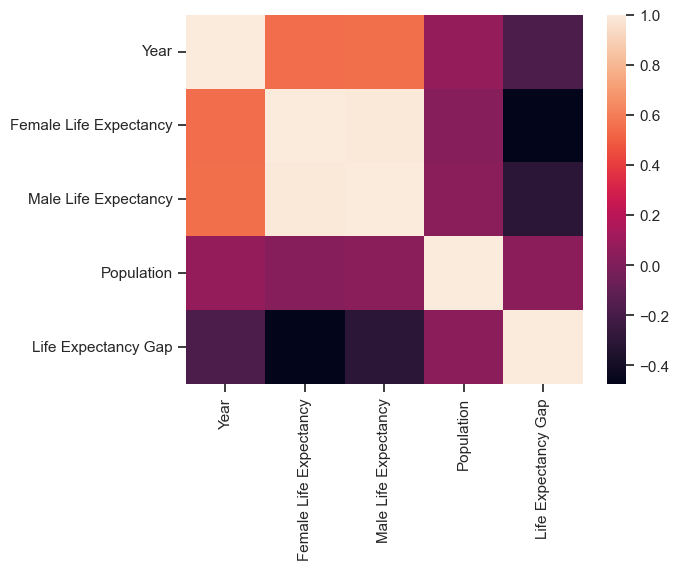

In [79]:
data2 = data[['Year', 'Female Life Expectancy', 'Male Life Expectancy', 'Population','Life Expectancy Gap']]
sns.heatmap(data2.corr())

<Axes: >

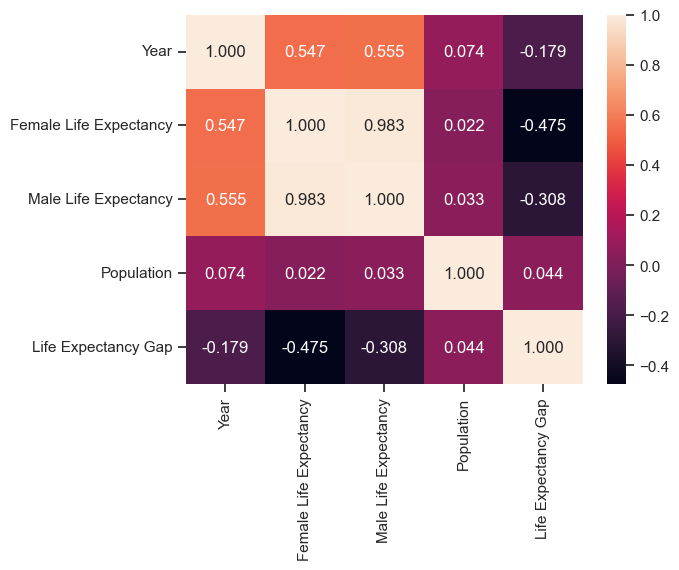

In [80]:
data2 = data[['Year', 'Female Life Expectancy', 'Male Life Expectancy', 'Population','Life Expectancy Gap']]
sns.heatmap(data2.corr(), annot=True, fmt='.3f')

<Axes: >

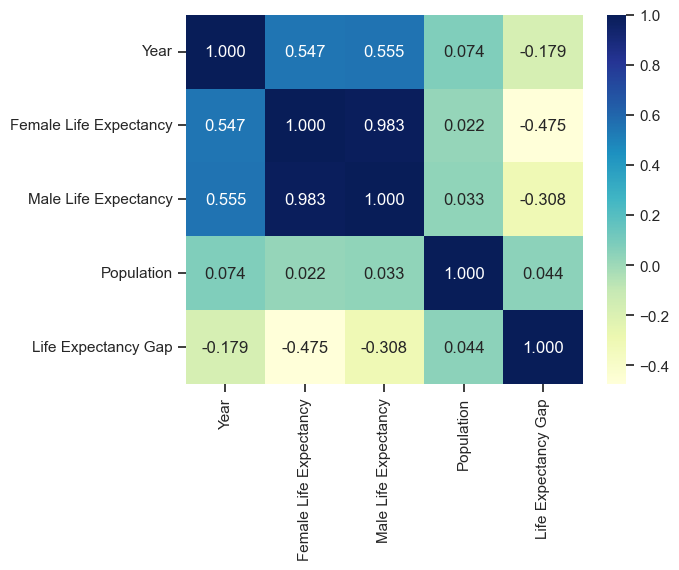

In [82]:
data2 = data[['Year', 'Female Life Expectancy', 'Male Life Expectancy', 'Population','Life Expectancy Gap']]
sns.heatmap(data2.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

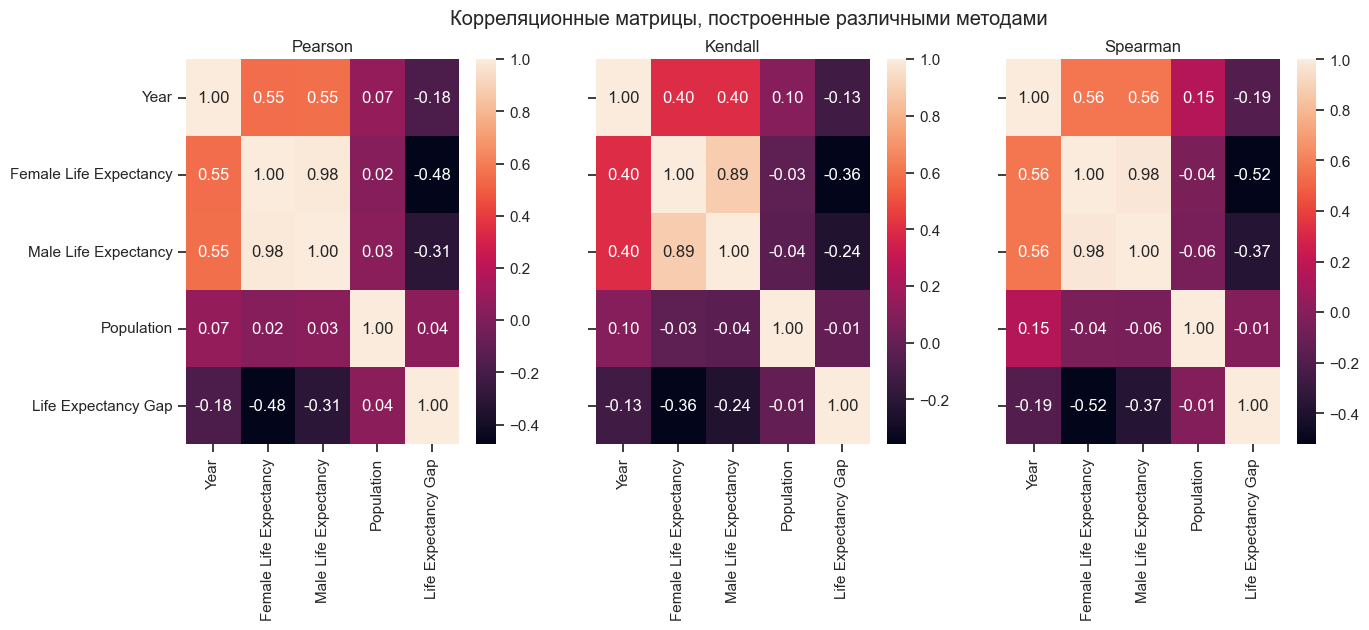

In [89]:
data2 = data[['Year', 'Female Life Expectancy', 'Male Life Expectancy', 'Population','Life Expectancy Gap']]
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data2.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data2.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data2.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

<Axes: >

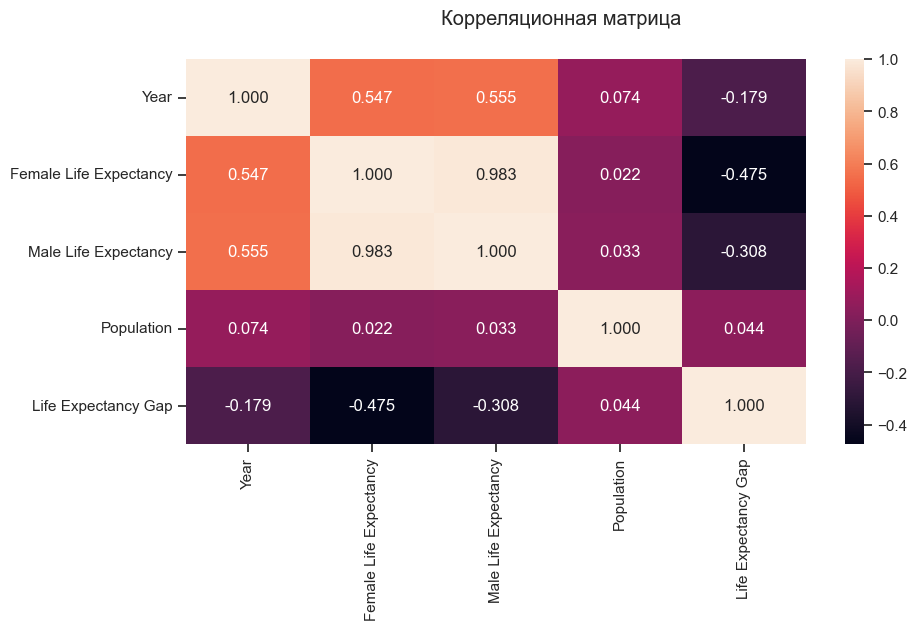

In [90]:
data2 = data[['Year', 'Female Life Expectancy', 'Male Life Expectancy', 'Population','Life Expectancy Gap']]
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data2.corr(), ax=ax, annot=True, fmt='.3f')